In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


%matplotlib inline

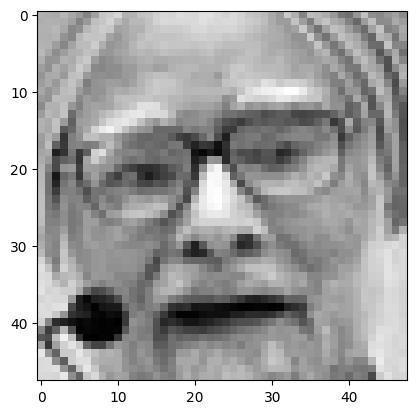

In [2]:
img = np.asarray(Image.open('./images/train/angry/1.jpg'))
imgplot = plt.imshow(img, cmap='gray') 

In [3]:
import pathlib
data_dir = pathlib.Path('./images/images')
image_count = len(list(data_dir.glob('*/*/*.jpg')))
image_count

35887

In [4]:
img1 = Image.open('./images/train/sad/3.jpg')
img1.size

(48, 48)

In [5]:
batch_size = 128
img_height = 48 
img_width = 48

In [6]:
data_dir_train = pathlib.Path('./images/images/train')
data_dir_val = pathlib.Path('./images/images/validation')

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1.0/255.0,
                                  width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   rotation_range = 20,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale= 1.0/255)

train_generator = train_datagen.flow_from_directory(data_dir_train,
                                                    target_size=(48,48),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = validation_datagen.flow_from_directory(data_dir_val,
                                                    target_size=(48,48),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [8]:
num_classes = 7

In [9]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Rescaling, Input, Dropout, BatchNormalization
from tensorflow.keras import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping

In [10]:
vggnet = Sequential([
    Input(shape=(48, 48, 1)),
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPool2D(pool_size=2, strides=2, padding='same'),
    Dropout(0.2),

    Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    MaxPool2D(pool_size=2, strides=2, padding='same'),
    Dropout(0.2),

    Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=2, strides=2, padding='same'),
    Dropout(0.2),

    Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
    Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
    Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=2, strides=2, padding='same'),
    Dropout(0.2),

    Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
    Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
    Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=2, strides=2, padding='same'),

    Flatten(),
    Dense(units=4096, activation='relu'),
    Dense(units=4096, activation='relu'),
    Dropout(0.2),
    Dense(units=num_classes, activation='softmax')
])


In [11]:
vggnet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 128)       147584    
                                                        

In [12]:
from tensorflow.keras.optimizers import Adam

vggnet.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
from tensorflow.python.client import device_lib 

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10361386047606172402
xla_global_id: -1
]


In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint

epochs = 50

vggnet.fit(
    train_generator, 
    validation_data=validation_generator,
    epochs=epochs,
    callbacks=[ModelCheckpoint('vggnet.keras', monitor='val_accuracy', save_best_only=True, mode='max')]
)

Epoch 1/50
146/226 [==================>...........] - ETA: 4:12 - loss: 2.1507 - accuracy: 0.2400

KeyboardInterrupt: 

In [25]:
model = tf.keras.models.load_model('vggnet.keras')

In [64]:
img = np.asarray(Image.open('./images/train/angry/1.jpg').convert('gray'))
img.shape


ValueError: conversion from L to gray not supported

In [61]:
model.predict(img)

ValueError: in user code:

    File "c:\Users\garga\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2341, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\garga\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2327, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\garga\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2315, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\garga\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2283, in predict_step
        return self(x, training=False)
    File "c:\Users\garga\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\garga\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 48, 48, 3), found shape=(None, 48, 2)
